# Example: Multi-metric runs
----------------------------

This example shows how to evaluate an atom's pipeline on multiple metrics.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

In [2]:
# Load data
X = pd.read_csv("./datasets/abalone.csv")

# Let's have a look
X.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, n_jobs=1, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (4177, 9)
Train set size: 3342
Test set size: 835
-------------------------------------
Memory: 509.72 kB
Scaled: False
Categorical features: 1 (12.5%)
Outlier values: 189 (0.6%)



In [4]:
atom.encode()

Fitting Encoder...
Encoding categorical columns...
 --> OneHot-encoding feature Sex. Contains 3 classes.


In [5]:
# For every step of the BO, both metrics are calculated,
# but only the first is used for optimization!
atom.run(
    models=["lsvm", "hGBM"],
    metric=("r2", "rmse"),
    n_trials=10,
    n_bootstrap=6,
)


Training ========================= >>
Models: lSVM, hGBM
Metric: r2, neg_root_mean_squared_error


Running hyperparameter tuning for LinearSVM...
| trial |                    loss |       C |    dual |      r2 | best_r2 | neg_root_mean_squared_error | best_neg_root_mean_squared_error | time_trial | time_ht |    state |
| ----- | ----------------------- | ------- | ------- | ------- | ------- | --------------------------- | -------------------------------- | ---------- | ------- | -------- |
| 0     | squared_epsilon_insen.. |   0.001 |    True |  0.2887 |  0.2887 |                     -2.6528 |                          -2.6528 |     0.041s |  0.041s | COMPLETE |
| 1     | squared_epsilon_insen.. |  0.0534 |   False |  0.3862 |  0.3862 |                     -2.5926 |                          -2.5926 |     0.038s |  0.079s | COMPLETE |
| 2     | squared_epsilon_insen.. |  0.0105 |    True |   0.433 |   0.433 |                     -2.4084 |                          -2.4084 |     0.041s |

In [6]:
# Check the robustness of the pipeline using cross-validation
atom.winner.cross_validate()

Applying cross-validation...


train_r2   test_r2  train_neg_root_mean_squared_error  \
0     0.672482  0.534480                          -1.841417   
1     0.669693  0.541603                          -1.850140   
2     0.674650  0.525120                          -1.860947   
3     0.661519  0.579041                          -1.851866   
4     0.666829  0.558253                          -1.867706   
mean  0.669035  0.547699                          -1.854415   
std   0.004587  0.019055                           0.009089   

      test_neg_root_mean_squared_error  time (s)  
0                            -2.214880  1.079982  
1                            -2.193359  1.113014  
2                            -2.111204  1.109009  
3                            -2.194239  1.065969  
4                            -2.110524  1.136033  
mean                         -2.164841  1.100801  
std                           0.044741  0.024918

## Analyze the results

In [7]:
# The columns in the results dataframe contain a list of
# scores, one for each metric (in the same order as called)
atom.results[["score_ht", "score_train", "score_test"]]

score_ht        score_train  \
lSVM  [0.4925303455788521, -2.262753922393612]  [0.4592, -2.3795]   
hGBM   [0.5699377046439738, -2.08304173753828]  [0.6668, -1.8677]   

             score_test  
lSVM  [0.4584, -2.3369]  
hGBM  [0.5583, -2.1105]

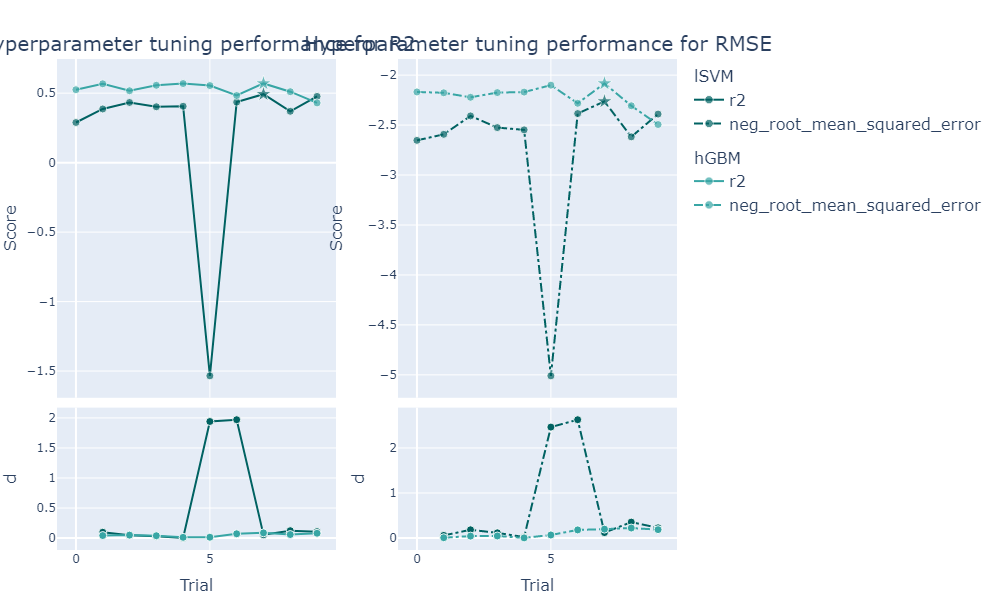

In [8]:
# Some plots allow us to choose the metric we want to show
with atom.canvas():
    atom.plot_trials(metric="r2", title="Hyperparameter tuning performance for R2")
    atom.plot_trials(metric="rmse", title="Hyperparameter tuning performance for RMSE")

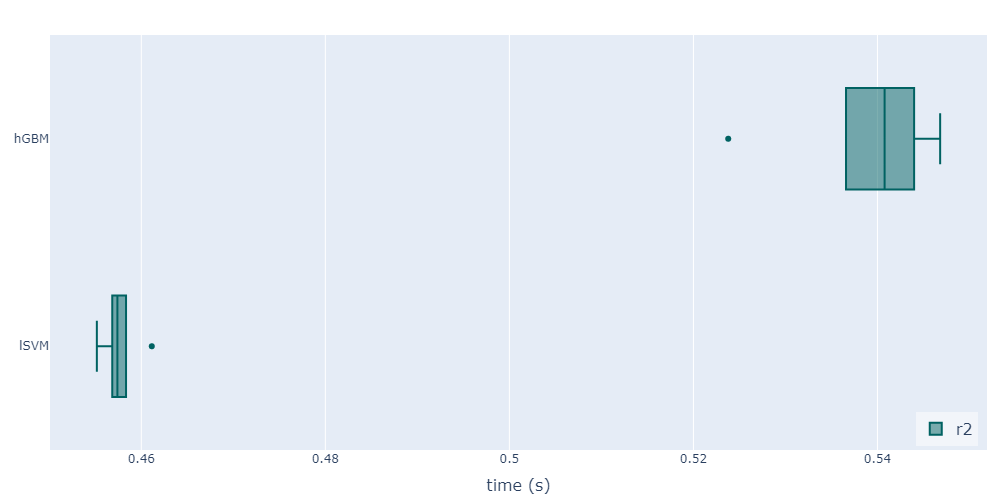

In [9]:
atom.plot_results(metric="r2")